In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df_path = '../data/raw/Housing.csv'
df_raw = pd.read_csv(df_path)
df_eda = df_raw.copy()

print(df_eda.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [2]:
# Check for null values in the dataframe
null_counts = df_eda.isnull().sum()
print("Null values per column:")
print(null_counts)

total_nulls = null_counts.sum()
print("\nTotal null values:", total_nulls)

if total_nulls:
  print("\nRows with any null values (showing up to 10):")
  display(df_eda[df_eda.isnull().any(axis=1)].head(10))
else:
  print("\nNo null values found.")

Null values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Total null values: 0

No null values found.


In [3]:
print(df_eda['furnishingstatus'].unique())
print(df_eda['mainroad'].unique())
print(df_eda['guestroom'].unique())
print(df_eda['basement'].unique())
print(df_eda['hotwaterheating'].unique())
print(df_eda['airconditioning'].unique())

['furnished' 'semi-furnished' 'unfurnished']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']


In [4]:

# Convert categorical columns to int
# For binary columns (yes/no), map to 0/1
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
  df_eda[col] = df_eda[col].map({'yes': 1, 'no': 0})

# For furnishingstatus with more than 2 uniques, map to int
df_eda['furnishingstatus'] = df_eda['furnishingstatus'].map({'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2})

In [5]:
features_X = df_eda.drop(columns=['price'], axis=1)
target_Y = df_eda['price']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_X, target_Y, test_size=0.2, random_state=42
)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

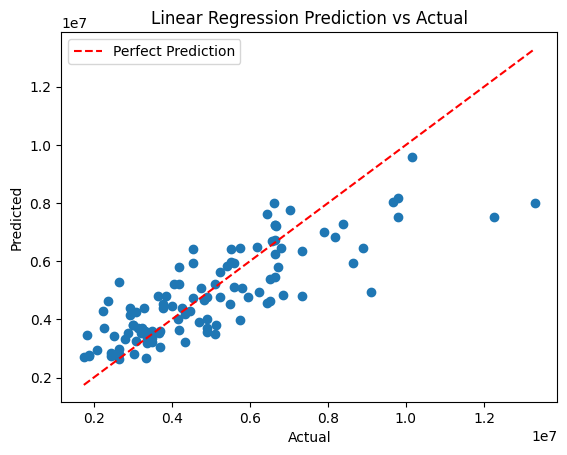

In [11]:
plt.scatter(y_test, y_pred)

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.title("Linear Regression Prediction vs Actual")
plt.show()